In [103]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

<h2>Handling data</h2>

In [56]:
dataset = np.load('Data/dataset.npy')
images_paths = pd.read_csv('Data/images_paths.csv', index_col=None).squeeze()

In [57]:
dataset.shape

(3862, 48, 32, 4)

In [58]:
labels = pd.read_csv('Data/SkinLabelsEncodings.csv', index_col=0)

In [59]:
labels.shape

(3996, 8)

In [60]:
labels.head()

,Female,Male,Mag,Paladyn,Tancerz ostrzy,Tropiciel,Wojownik,Łowca
SkinUrl,,,,,,,,
https://www.margonem.pl/obrazki/postacie/bd/10/f_bd09.gif,1.0,0.0,0.0,0.0,0.999369,0.0,0.000631,0.0
https://www.margonem.pl/obrazki/postacie/bd/10/f_bd18.gif,1.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
https://www.margonem.pl/obrazki/postacie/bd/10/m_bd01.gif,0.0,1.0,0.0,0.0,1.000000,0.0,0.000000,0.0
https://www.margonem.pl/obrazki/postacie/bd/10/m_bd04.gif,0.0,1.0,0.0,0.0,0.999824,0.0,0.000176,0.0
https://www.margonem.pl/obrazki/postacie/bd/100/f_bd04.gif,1.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0


In [61]:
images_paths.head()

0         Data/Skins/vip/587080_2.gif
1      Data/Skins/spec/valczemyna.gif
2    Data/Skins/clan/zorza_10200m.gif
3          Data/Skins/vip/3239014.gif
4    Data/Skins/clan/zorza_10200f.gif
Name: 0, dtype: object

In [62]:
labels.index = 'Data/Skins/' + labels.index.str.replace('https://www.margonem.pl/obrazki/postacie/', '')

In [63]:
labels.head()

,Female,Male,Mag,Paladyn,Tancerz ostrzy,Tropiciel,Wojownik,Łowca
SkinUrl,,,,,,,,
Data/Skins/bd/10/f_bd09.gif,1.0,0.0,0.0,0.0,0.999369,0.0,0.000631,0.0
Data/Skins/bd/10/f_bd18.gif,1.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0
Data/Skins/bd/10/m_bd01.gif,0.0,1.0,0.0,0.0,1.000000,0.0,0.000000,0.0
Data/Skins/bd/10/m_bd04.gif,0.0,1.0,0.0,0.0,0.999824,0.0,0.000176,0.0
Data/Skins/bd/100/f_bd04.gif,1.0,0.0,0.0,0.0,1.000000,0.0,0.000000,0.0


In [64]:
labels = labels.loc[images_paths]

In [65]:
images_paths.shape

(3862,)

In [66]:
labels.shape

(3862, 8)

For prototype let's just predict gender

In [67]:
labels = labels['Female']
labels.head()

SkinUrl
Data/Skins/vip/587080_2.gif         1.000000
Data/Skins/spec/valczemyna.gif      0.117647
Data/Skins/clan/zorza_10200m.gif    0.000000
Data/Skins/vip/3239014.gif          0.000000
Data/Skins/clan/zorza_10200f.gif    1.000000
Name: Female, dtype: float64

In [91]:
labels = labels.round() # for simplicity
labels = np.array(labels)

In [92]:
X_train, X_test, y_train, y_test = train_test_split(dataset, labels, test_size=0.2)

In [93]:
print(dataset.max())
print(dataset.min())

1.0
-1.0


Dataset already normalized to [-1, 1]

<h2>Defining Model</h2>

In [98]:
baseline_acc = (labels == 0.0).sum() / len(labels) # accuracy based on informed guess (informed about class probability)
baseline_acc

0.672449508026929

In [139]:
model = tf.keras.models.Sequential()
#input: 48x32x4
model.add(tf.keras.layers.Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=dataset.shape[1:])) #48x32x16
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(32, (3, 3), strides=(2, 2), padding='same', activation='relu')) #24x16x32
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')) #24x16x32
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), strides=(2, 2), padding='same', activation='relu')) #12x8x64
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')) #12x8x64
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(128, (3, 3), strides=(2, 2), padding='same', activation='relu')) #6x4x128
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Conv2D(32, (1, 1), padding='same', activation='relu')) #6x4x32
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Flatten()) #768
model.add(tf.keras.layers.Dense(500, activation='relu')) #1000
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) #1

In [140]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['acc'])

In [141]:
N_EPOCHS = 10
BATCH_SIZE = 32
h = model.fit(X_train, y_train, epochs=N_EPOCHS, batch_size=BATCH_SIZE, validation_split=0.1)

Train on 2780 samples, validate on 309 samples
Epoch 1/10
2780/2780 [==============================] - 9s 3ms/sample - loss: 0.6094 - acc: 0.6712 - val_loss: 0.5313 - val_acc: 0.7217
Epoch 2/10
2780/2780 [==============================] - 8s 3ms/sample - loss: 0.4609 - acc: 0.7766 - val_loss: 0.3961 - val_acc: 0.8317
Epoch 3/10
2780/2780 [==============================] - 8s 3ms/sample - loss: 0.4149 - acc: 0.8299 - val_loss: 0.3538 - val_acc: 0.8511
Epoch 4/10
2780/2780 [==============================] - 7s 3ms/sample - loss: 0.3674 - acc: 0.8576 - val_loss: 0.3301 - val_acc: 0.8673
Epoch 5/10
2780/2780 [==============================] - 7s 3ms/sample - loss: 0.3455 - acc: 0.8647 - val_loss: 0.3215 - val_acc: 0.8608
Epoch 6/10
2780/2780 [==============================] - 7s 3ms/sample - loss: 0.3297 - acc: 0.8701 - val_loss: 0.3229 - val_acc: 0.8706
Epoch 7/10
2780/2780 [==============================] - 7s 3ms/sample - loss: 0.3194 - acc: 0.8773 - val_loss: 0.3313 - val_acc: 0.8608
E

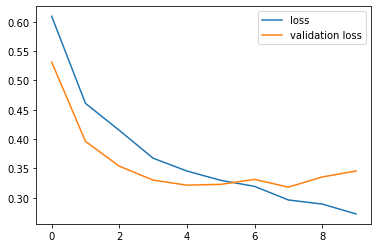

In [142]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.legend(['loss', 'validation loss'])

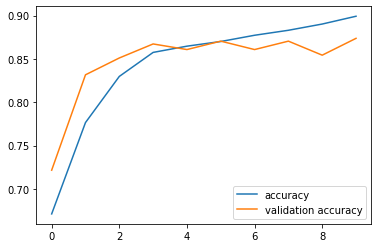

In [143]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['accuracy', 'validation accuracy'])

<h3>Test on test data</h3>

In [144]:
loss, acc = model.evaluate(X_test, y_test, verbose=False)

In [145]:
print('Loss on test set: %.3f\nAccuracy on test set: %.2f%%' % (loss, acc * 100.0)) 

Loss on test set: 0.297
Accuracy on test set: 88.36%
